# Python for Data Analysis II




**Agenda:**

    * matplotlib
    * seaborn
    * numpy
    * scipy

# Basic plotting

In [1]:
import matplotlib.pyplot as plt 

In [2]:
%matplotlib inline  # needed for inline plotting in jupyter

UsageError: unrecognized arguments: # needed for inline plotting in jupyter


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('Churn-Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,NaN,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            9992 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    9985 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.dropna(inplace=True)  # dropping the null values

## Boxplot

{'boxes': [<matplotlib.lines.Line2D at 0x7f9ddf13d4a8>],
 'caps': [<matplotlib.lines.Line2D at 0x7f9ddf13deb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ddf0ceb70>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f9ddf0ce748>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f9ddf13d5f8>,
  <matplotlib.lines.Line2D at 0x7f9ddf13da90>]}

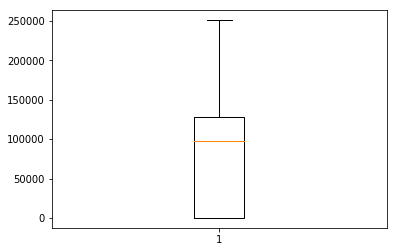

In [8]:
plt.boxplot(df.Balance)

### Plot

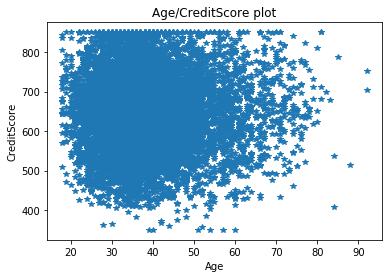

In [9]:
plt.plot(df.Age, df.CreditScore, '*')
plt.xlabel('Age')
plt.ylabel('CreditScore')
plt.title('Age/CreditScore plot')
plt.show()

In [10]:
plt.hist?

(array([8.26141836e-03, 2.94160667e-02, 4.90674078e-02, 2.52718142e-02,
        1.11732298e-02, 7.08315050e-03, 2.81700823e-03, 1.72000022e-03,
        2.70866176e-04, 5.41732352e-05]),
 array([18. , 25.4, 32.8, 40.2, 47.6, 55. , 62.4, 69.8, 77.2, 84.6, 92. ]),
 <a list of 10 Patch objects>)

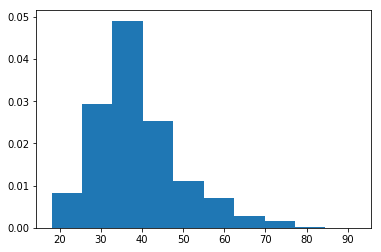

In [11]:
plt.hist(df.Age.values, normed=True)

(array([  18.,  165.,  447.,  956., 1442., 1861., 1948., 1523.,  964.,
         654.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

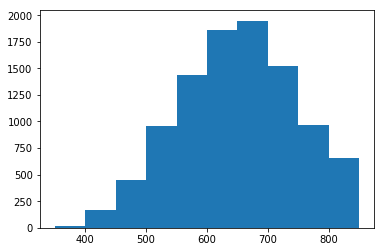

In [12]:
plt.hist(df.CreditScore.values)

(array([  18.,  165.,  447.,  956., 1442., 1861., 1948., 1523.,  964.,
         654.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <a list of 10 Patch objects>)

/home/kirill/.local/lib/python3.5/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


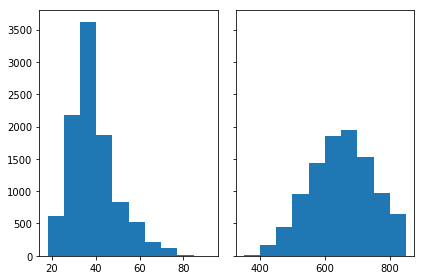

In [13]:
_, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
axs[0].hist(df.Age.values, bins=10)  # <-- first subplot (Age histogram)
axs[1].hist(df.CreditScore.values, bins=10)  # <-- second subplot (CreditScore)

### Bar plot

<Container object of 2 artists>

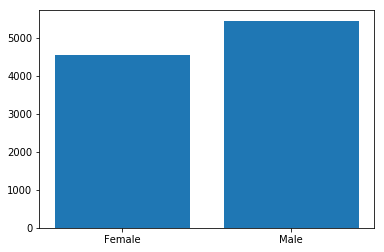

In [14]:
# See the difference in frequency
plt.bar(df.Gender.value_counts().keys(), df.Gender.value_counts().values)

### Horizontal bar plot

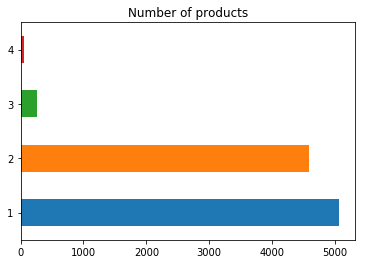

In [15]:
# How many people are using how many products?
df.NumOfProducts.value_counts().plot(kind='barh',title="Number of products");

### Pie chart

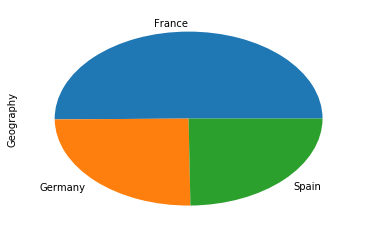

In [16]:
df.Geography.value_counts().plot(kind='pie')

We can plot more interesting plots, with matplotlib already embedded into pandas functions. For example:

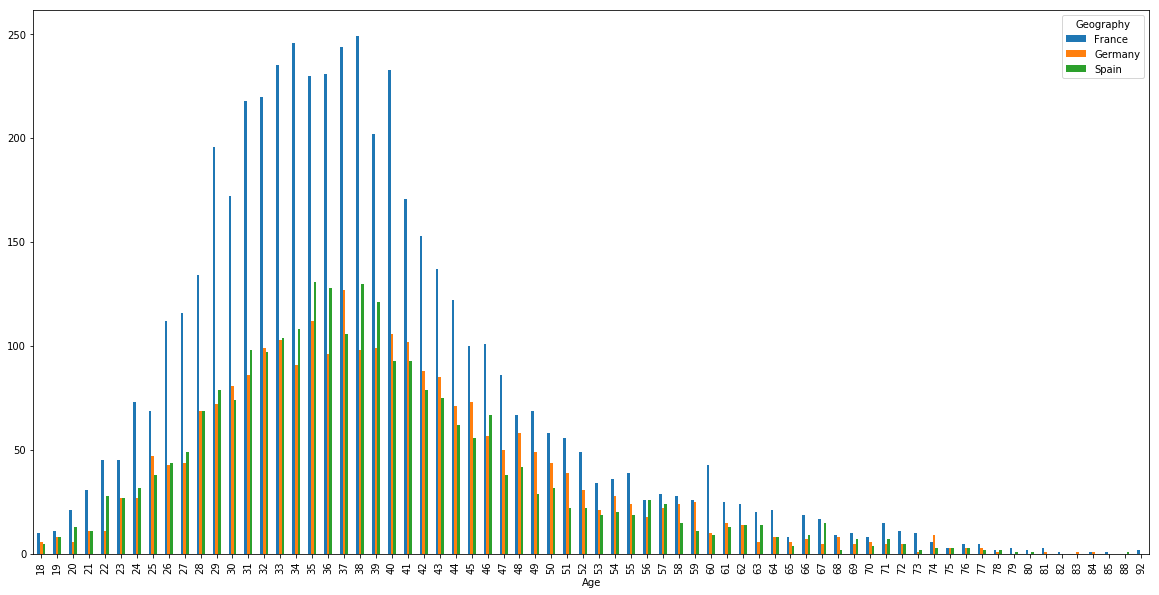

In [17]:
df.groupby(['Age', 'Geography']).size().unstack('Geography').plot(kind='bar', figsize=(20,10))

# Seaborn basic plotting

In [18]:
!pip3 install seaborn  # for installation

You are using pip version 8.1.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [19]:
import seaborn as sns

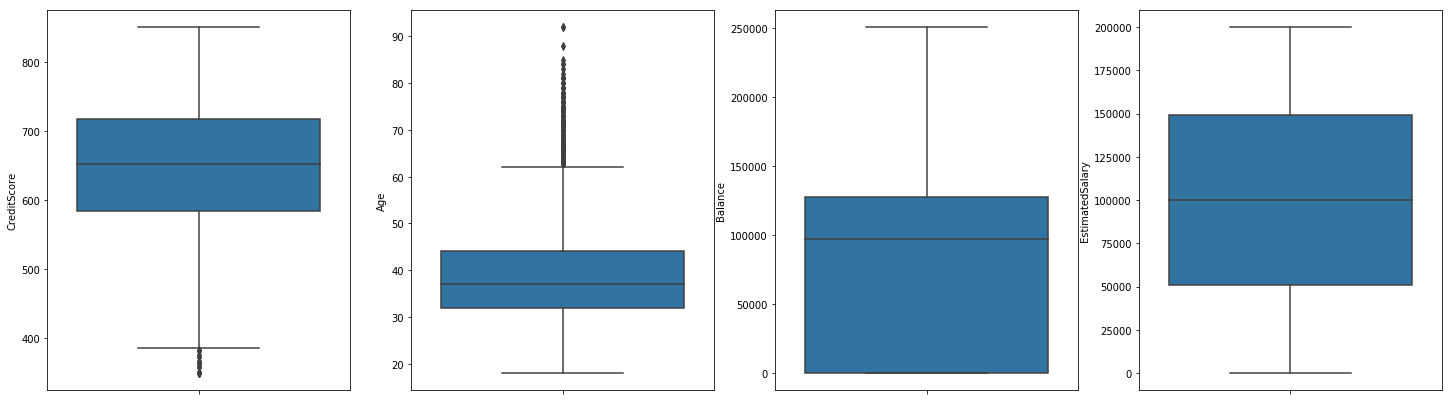

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 7))
# enumerate returns index of element in list and element itself
for (index, col) in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    sns.boxplot(data=df, y=col, ax=axes[index])

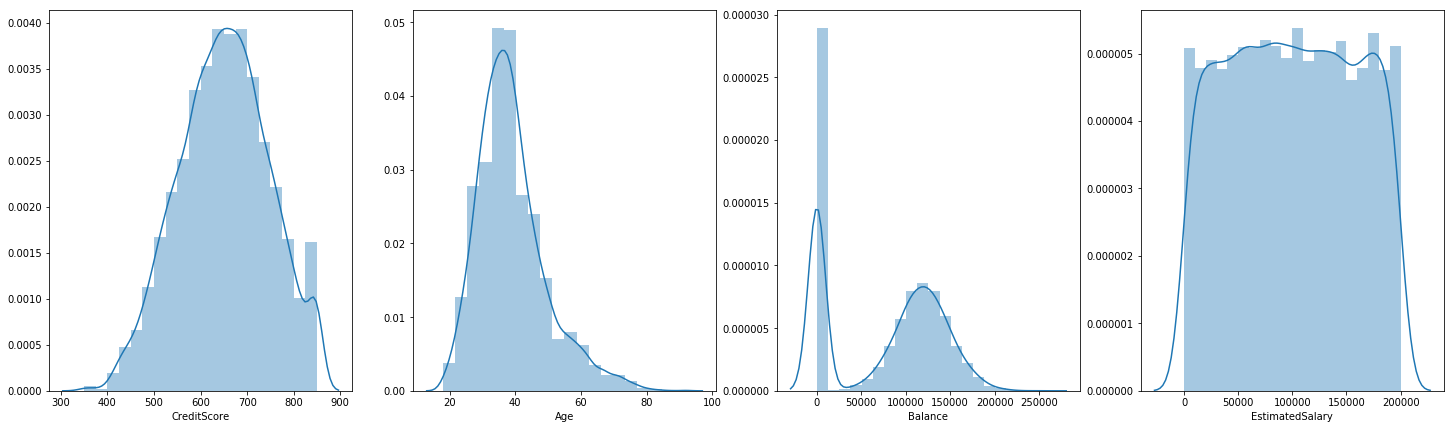

In [21]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(25, 7))
for (index, col) in enumerate(['CreditScore', 'Age', 'Balance', 'EstimatedSalary']):
    sns.distplot(df[col], bins=20, ax=axes[index])

In [22]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004085,0.005191,0.000908,-0.006368,-0.008643,0.008563,0.000625,0.011716,-0.005427,-0.015581
CustomerId,0.004085,1.000000,0.004191,0.009683,-0.014249,-0.012308,0.017736,-0.013575,0.001613,0.015328,-0.006045
CreditScore,0.005191,0.004191,1.000000,-0.004225,0.001057,0.006442,0.013760,-0.005090,0.026115,-0.001240,-0.026406
Age,0.000908,0.009683,-0.004225,1.000000,-0.009847,0.028510,-0.030547,-0.011896,0.085518,-0.008016,0.285222
Tenure,-0.006368,-0.014249,0.001057,-0.009847,1.000000,-0.012253,0.013068,0.022737,-0.027932,0.008038,-0.013821
Balance,-0.008643,-0.012308,0.006442,0.028510,-0.012253,1.000000,-0.305079,-0.014318,-0.009995,0.012967,0.118469
NumOfProducts,0.008563,0.017736,0.013760,-0.030547,0.013068,-0.305079,1.000000,0.002597,0.010825,0.013374,-0.049465
HasCrCard,0.000625,-0.013575,-0.005090,-0.011896,0.022737,-0.014318,0.002597,1.000000,-0.012313,-0.010285,-0.007694
IsActiveMember,0.011716,0.001613,0.026115,0.085518,-0.027932,-0.009995,0.010825,-0.012313,1.000000,-0.011161,-0.155444
EstimatedSalary,-0.005427,0.015328,-0.001240,-0.008016,0.008038,0.012967,0.013374,-0.010285,-0.011161,1.000000,0.011460


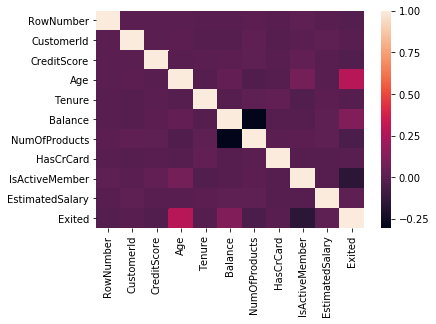

In [23]:
sns.heatmap(df.corr())

In [24]:
sns.pairplot?

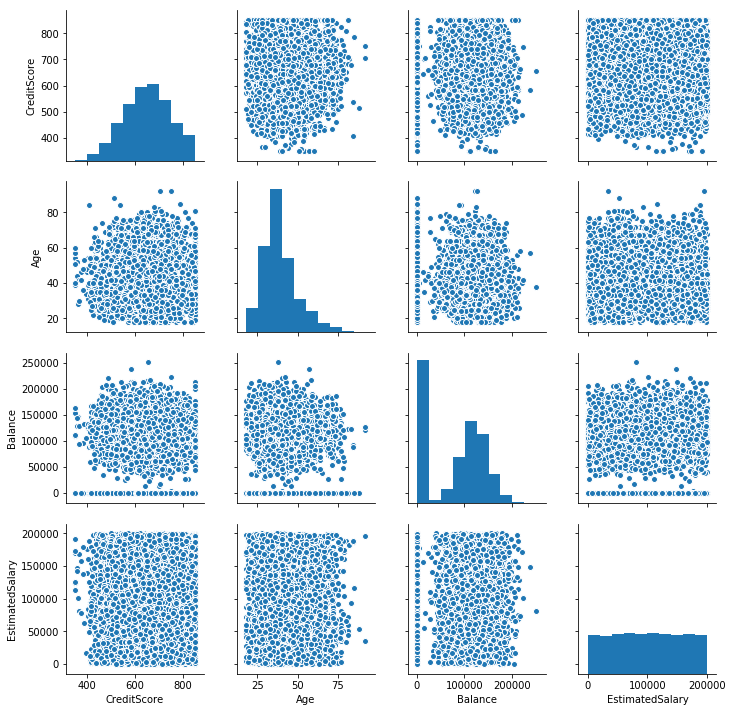

In [25]:
# Plot pairwise relationships in a dataset.
sns.pairplot(data=df, vars=['CreditScore', 'Age', 'Balance', 'EstimatedSalary'], kind='scatter')  

# Extra

https://github.com/luminousmen/python_for_ds
    
Filename: PoliceKillingsUS.csv

In [26]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding='windows-1252')

In [27]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [28]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


In [29]:
kill.dropna(inplace=True)

Text(0.5,1,'Manner of death')

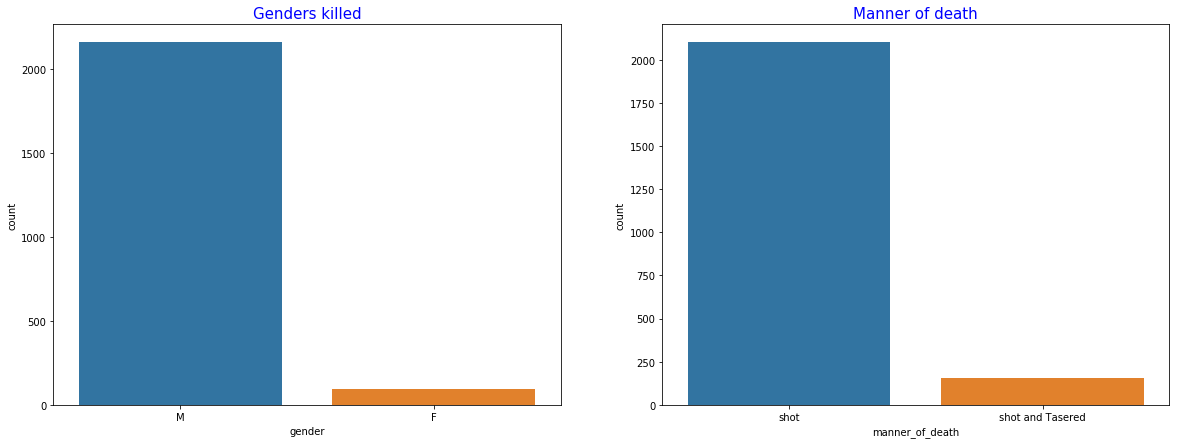

In [30]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

sns.countplot(kill.gender, ax=axes[0])
axes[0].set_title('Genders killed', color='blue', fontsize=15)
sns.countplot(kill.manner_of_death, ax=axes[1])
axes[1].set_title('Manner of death', color='blue', fontsize=15)

Text(0.5,1,'Kill weapon')

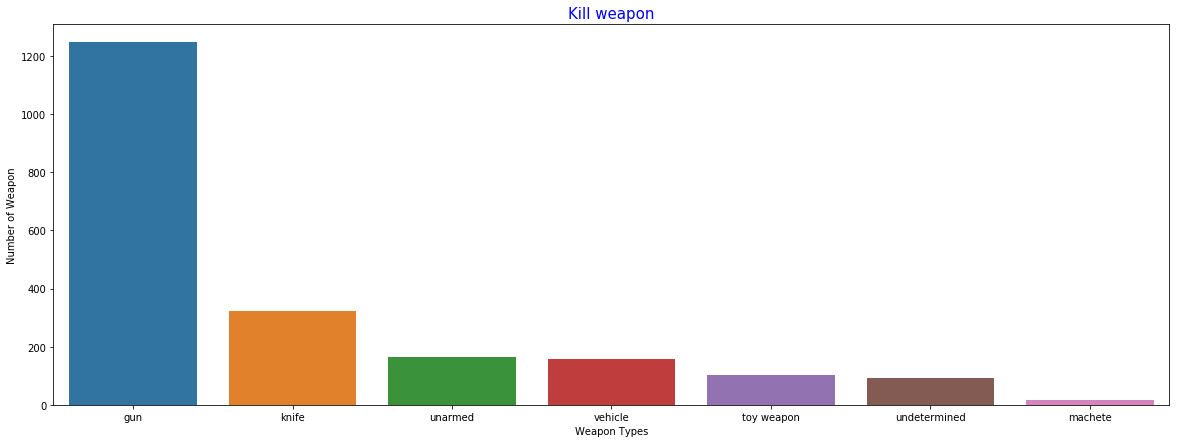

In [31]:
# kill weapon
armed = kill.armed.value_counts()
plt.figure(figsize=(20,7))
sns.barplot(x=armed[:7].index,y=armed[:7].values)
plt.ylabel('Number of Weapon')
plt.xlabel('Weapon Types')
plt.title('Kill weapon',color = 'blue',fontsize=15)

Text(0.5,1,'Threat types')

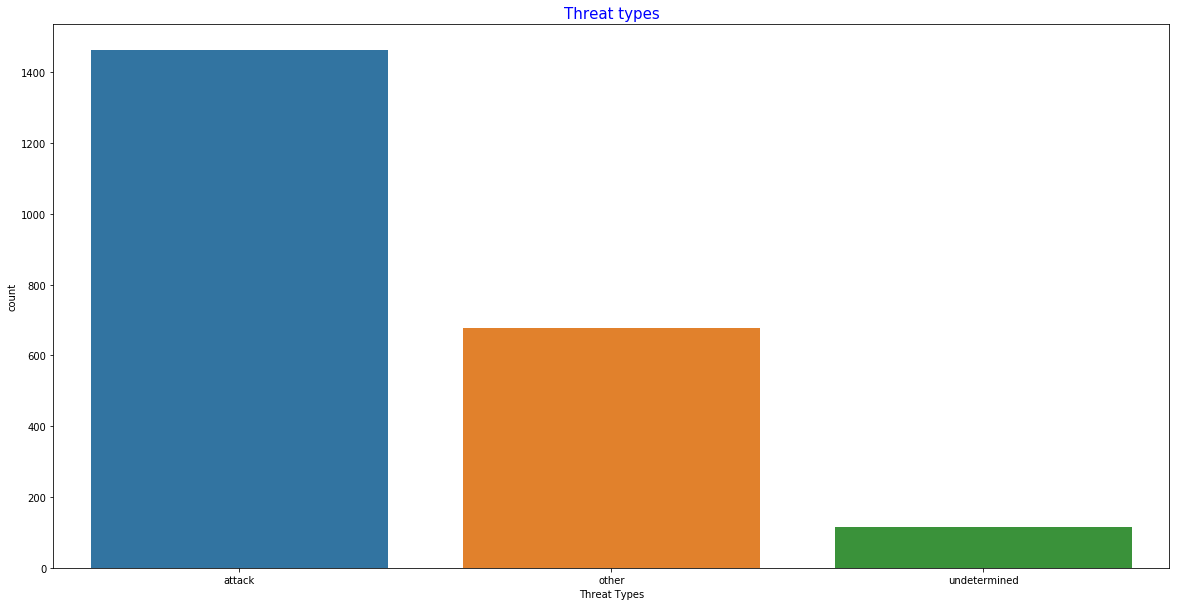

In [32]:
# Threat types
plt.figure(figsize=(20,10))
sns.countplot(kill.threat_level)  
plt.xlabel('Threat Types')
plt.title('Threat types',color = 'blue', fontsize = 15)

Text(0.5,1,'Most dangerous cities')

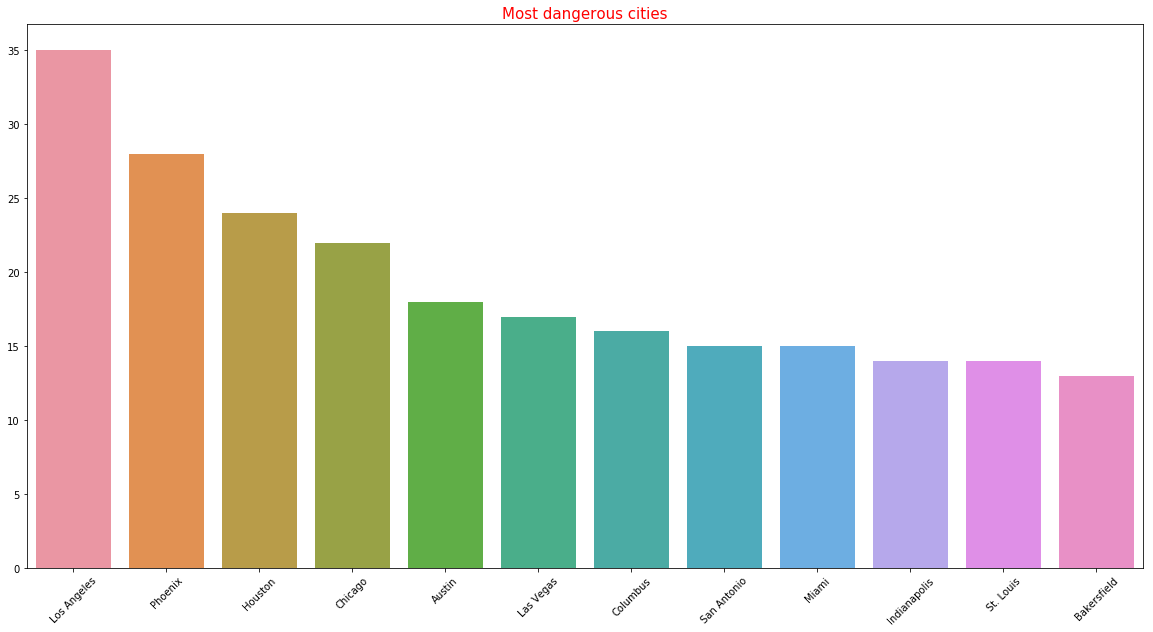

In [33]:
# Most dangerous cities
city = kill.city.value_counts()
plt.figure(figsize=(20,10))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title('Most dangerous cities',color='red',fontsize=15)

Text(0.5,1,'Kill Numbers from States')

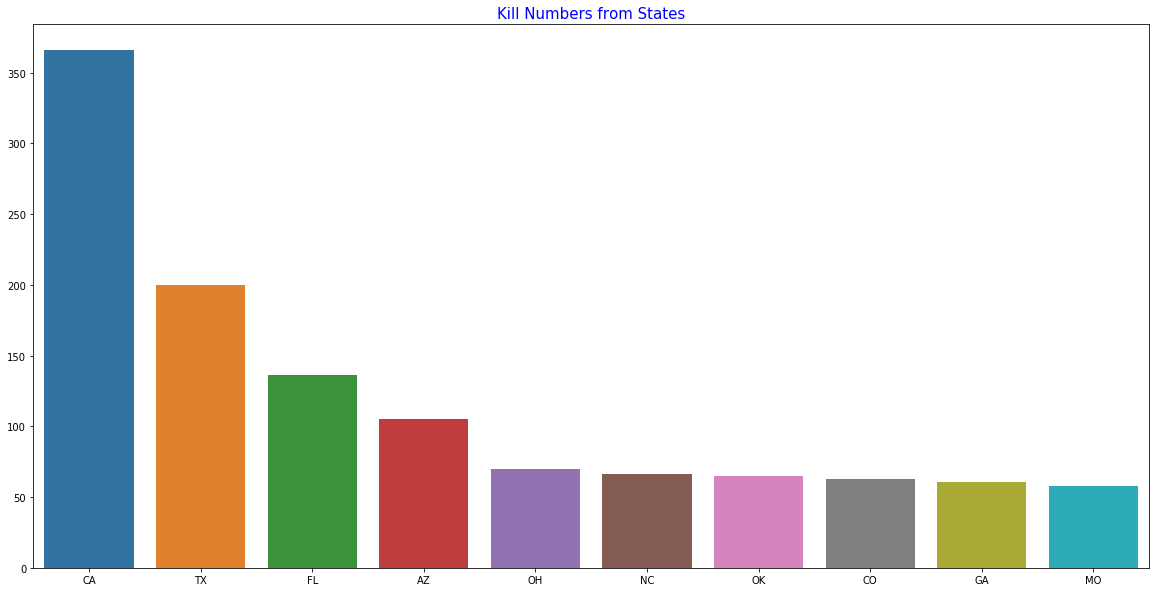

In [34]:
# Kill numbers from states in kill data
sta = kill.state.value_counts().index[:10]
plt.figure(figsize=(20,10))
sns.barplot(x=sta, y=kill.state.value_counts().values[:10])
plt.title('Kill Numbers from States',color = 'blue',fontsize=15)

# Numpy

Install numpy https://www.scipy.org/install.html

In [35]:
import numpy as np

In [36]:
np.__version__

'1.14.1'

## Arrays

The central feature of NumPy is the array object class. Arrays are similar to lists in Python,
except that every element of an array must be of the same type, typically a numeric type like
float or int. Arrays make operations with large amounts of numeric data very fast and are
generally much more efficient than lists.

In [37]:
a = np.array([1, 4, 5, 8], float) # <-- constructor of array in numpy

In [38]:
1.

1.0

In [39]:
a

array([1., 4., 5., 8.])

In [40]:
type(a)

numpy.ndarray

In [41]:
a

array([1., 4., 5., 8.])

Here, the function array takes two arguments: the list to be converted into the array and the
type of each member of the list. Array elements are accessed, sliced, and manipulated just like
lists:

In [42]:
a[:2]

array([1., 4.])

In [43]:
a

array([1., 4., 5., 8.])

In [44]:
a[3]

8.0

In [45]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)

In [46]:
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [47]:
a[1][0]  # <-- accesing elemtns of matrix

4.0

In [48]:
a[0, 0]

1.0

In [49]:
a = np.array([[1, 2, 3], [4, 5, 6]], float)
a

array([[1., 2., 3.],
       [4., 5., 6.]])

In [50]:
a[1,:2]

array([4., 5.])

In [51]:
a[:,2]

array([3., 6.])

In [52]:
a.shape 

(2, 3)

In [53]:
a = np.array(range(6), float)
a

array([0., 1., 2., 3., 4., 5.])

In [54]:
a.reshape((2, 3))  # <-- tuple of dimensions

array([[0., 1., 2.],
       [3., 4., 5.]])

In [55]:
a

array([0., 1., 2., 3., 4., 5.])

In [56]:
a.transpose()

array([0., 1., 2., 3., 4., 5.])

In [57]:
a = np.array([1,2], float)
b = np.array([3,4,5,6], float)
c = np.array([7,8,9], float)
np.concatenate((a, b, c))

array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Other ways to create arrays

In [58]:
np.arange(5, dtype=float)

array([0., 1., 2., 3., 4.])

In [59]:
np.ones((2,3), dtype=float) 

array([[1., 1., 1.],
       [1., 1., 1.]])

In [60]:
np.zeros(7, dtype=int)

array([0, 0, 0, 0, 0, 0, 0])

## Array mathematics

In [61]:
a = np.array([1,2,3], float)
b = np.array([5,2,6], float)
a + b  # <-- [6, 4, 9]

array([6., 4., 9.])

In [62]:
a - b

array([-4.,  0., -3.])

In [63]:
a * b

array([ 5.,  4., 18.])

In [64]:
b / a

array([5., 1., 2.])

In [65]:
a % b

array([1., 0., 3.])

In [66]:
b ** a

array([  5.,   4., 216.])

In [67]:
a = np.array([1,2,3], float)
b = np.array([4,5], float)
a + b  # <-- Error

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In addition to the standard operators, NumPy offers a large library of common mathematical
functions that can be applied elementwise to arrays. Among these are the functions: abs,
sign, sqrt, log, log10, exp, sin, cos, tan, arcsin, arccos,
arctan, sinh, cosh, tanh, arcsinh, arccosh, and arctanh

## Basic array operations

In [68]:
a = np.array([2, 4, 3], float)
a.sum()

9.0

In [69]:
a.mean()

3.0

In [70]:
a.std()

0.816496580927726

In [71]:
a.min()

2.0

In [72]:
a.max()

4.0

In [73]:
a.var()

0.6666666666666666

DataFrame <- Series <- numpy.array 

## Array item selection and manipulation

In [74]:
a = np.array([[6, 4], [5, 9]], float)

In [75]:
a

array([[6., 4.],
       [5., 9.]])

In [76]:
a[a >= 6]

array([6., 9.])

In [77]:
a = np.array([2, 4, 6, 8], float)
b = np.array([0, 0, 1, 3, 2, 1], int)  # <-- index array that contain indexes from `a`
a.take(b)

array([2., 2., 4., 8., 6., 4.])

More: http://docs.scipy.org/doc/

# Scipy

In [78]:
!pip3 install scipy

    100% |████████████████████████████████| 33.1MB 42kB/s eta 0:00:011   40% |████████████▉                   | 13.3MB 1.3MB/s eta 0:00:16    56% |██████████████████▏             | 18.7MB 1.3MB/s eta 0:00:12    99% |███████████████████████████████▉| 32.9MB 1.6MB/s eta 0:00:01
    100% |████████████████████████████████| 12.1MB 124kB/s ta 0:00:01
You are using pip version 8.1.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [79]:
import scipy

SciPy is a collection of mathematical algorithms and convenience functions built on the Numpy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems such as MATLAB, IDL, Octave, R-Lab, and SciLab.

All of the statistics functions are located in the sub-package scipy.stats and a fairly complete listing of these functions can be obtained using info(stats) function.

In [80]:
from scipy import stats

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,NaN,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,NaN,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,NaN,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
print('Percentile:\n25%={}\n50%={}\n75%={}'.format(np.percentile(df['CreditScore'], 25), np.percentile(df['CreditScore'], 50), np.percentile(df['CreditScore'], 75)))

NameError: name 'np' is not defined

![](https://www.managedfuturesinvesting.com/images/default-source/default-album/measure-of-skewness.jpg)

In [ ]:
stats.skew(df['CreditScore'])  # skewness

In [ ]:
stats.kurtosis(df['CreditScore'])  # kurtosis

In [ ]:
# H0 - sample came from a normally distributed population
# H1 - it is not
stats.shapiro(df['CreditScore'])  # Shapiro-wilk

## Student’s t-test: the simplest statistical test

#### 1-sample t-test: testing the value of a population mean
`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to be equal to a given value (technically if observations are drawn from a Gaussian distributions of given population mean). It returns the T statistic, and the p-value.

In [ ]:
from scipy import stats
# is the mean is == 620?
# H0 - mean == 620
# H1 - mean != 620
stats.ttest_1samp(df['CreditScore'], 620) # p < 0.05 -> H1

#### 2-sample t-test: testing for difference across populations

To test if this difference in genders significant in credit scores, we do a 2-sample t-test with `scipy.stats.ttest_ind()`

In [ ]:
# H0 - there is some difference
# H1 - there is no difference
female_scores = df[df['Gender'] == 'Female']['CreditScore']
male_scores = df[df['Gender'] == 'Male']['CreditScore']
stats.ttest_ind(female_scores, male_scores) # p >= 0.05 -> H0

More in docs:

https://docs.scipy.org/doc/scipy/reference/